In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aliceinwonderland/alice-in-wonderland.txt


In [3]:
file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()

txt = txt.lower()

In [4]:
# REmoving Puncation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(txt)

['project',
 'gutenberg',
 's',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'title',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 '25',
 '2008',
 'ebook',
 '11',
 'release',
 'date',
 'march',
 '1994',
 'last',
 'updated',
 'december',
 '20',
 '2011',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'alice',
 's',
 '

In [5]:
txt

'project gutenberg\'s alice\'s adventures in wonderland, by lewis carroll\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: alice\'s adventures in wonderland\n\nauthor: lewis carroll\n\nposting date: june 25, 2008 [ebook #11]\nrelease date: march, 1994\n[last updated: december 20, 2011]\n\nlanguage: english\n\ncharacter set encoding: ascii\n\n*** start of this project gutenberg ebook alice\'s adventures in wonderland ***\n\n\n\n\n\n\n\n\n\n\nalice\'s adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conv

In [6]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [7]:
!pip install sklearn==0.19.1

ERROR: Could not find a version that satisfies the requirement sklearn==0.19.1 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.19.1
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
from nltk import sent_tokenize
sentences = sent_tokenize(txt)

In [9]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(txt)

In [10]:
# Removing all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]

In [11]:
words

['project',
 'gutenberg',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'title',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 'ebook',
 'release',
 'date',
 'march',
 'last',
 'updated',
 'december',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'alice',
 'adventures',
 'in',
 'wonderland',
 'lewis',
 'carroll',
 'the',
 'millennium',
 'fulcrum',
 'edition',
 'chapter',
 'down'

In [12]:
# Removing stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]


In [13]:
# Stemming the words 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]


# **Text is cleaned** !!

In [14]:
stemmed

['project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'titl',
 'alic',
 'adventur',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'post',
 'date',
 'june',
 'ebook',
 'releas',
 'date',
 'march',
 'last',
 'updat',
 'decemb',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'ascii',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 'adventur',
 'wonderland',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum',
 'edit',
 'chapter',
 'alic',
 'begin',
 'get',
 'tire',
 'sit',
 'sister',
 'bank',
 'noth',
 'twice',
 'peep',
 'book',
 'sister',
 'read',
 'pictur',
 'convers',
 'use',
 'book',
 'thought',
 'alic',
 'pictur',
 'convers',
 'consid',
 'mind',
 'well',
 'could',
 'hot',
 'day',
 'made',
 'feel',
 'sleepi',
 'st

In [15]:
final = stemmed

In [16]:
# Without stemming the words
words 

['project',
 'gutenberg',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'title',
 'alice',
 'adventures',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'posting',
 'date',
 'june',
 'ebook',
 'release',
 'date',
 'march',
 'last',
 'updated',
 'december',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'ascii',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'millennium',
 'fulcrum',
 'edition',
 'chapter',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 'nothing',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 'pictures',
 'conversations',
 'use',
 'book',
 'thought',
 'alice',
 'pictures',
 'conversations',
 'co

In [17]:
from collections import Counter
counts = Counter(words)

counts

Counter({'project': 87,
         'gutenberg': 30,
         'alice': 401,
         'adventures': 12,
         'wonderland': 8,
         'lewis': 4,
         'carroll': 4,
         'ebook': 9,
         'use': 29,
         'anyone': 5,
         'anywhere': 3,
         'cost': 4,
         'almost': 8,
         'restrictions': 2,
         'whatsoever': 2,
         'may': 28,
         'copy': 12,
         'give': 13,
         'away': 28,
         'terms': 22,
         'license': 15,
         'included': 3,
         'online': 4,
         'title': 1,
         'author': 1,
         'posting': 1,
         'date': 4,
         'june': 1,
         'release': 1,
         'march': 35,
         'last': 34,
         'updated': 2,
         'december': 1,
         'language': 1,
         'english': 7,
         'character': 2,
         'set': 23,
         'encoding': 1,
         'ascii': 3,
         'start': 3,
         'millennium': 1,
         'fulcrum': 1,
         'edition': 2,
         'chapter': 12,

In [18]:
len(counts)

2767

# First divide the words into clusters that are relevant to each other
# Then try plotting them using TSNE
# Then HYPERBOLIC EMBEDDINGS !!

# Dividing the words into relevant clusters

# Visualizing the frequencies of words

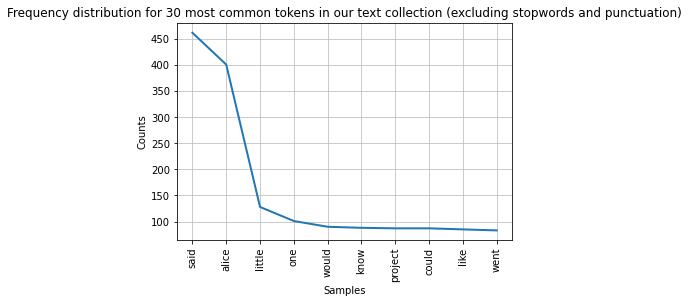

In [19]:
from nltk import FreqDist

fdist_filtered = FreqDist(words)
fdist_filtered.plot(10, title = 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

# *****************************************************************************

In [2]:
import re # For preprocessing 
import pandas as pd # For data handling
from time import time # To time our operations
from collections import defaultdict # For word frequency

import spacy # For preprocessing

import logging # Set up loggings to monitor gensim
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", 
                   datefmt = '%H:%M:%S', level=logging.INFO)

nlp = spacy.load('en', disable = ['ner', 'parser']) # Disabling Named Entity Recognition for speed

def cleaning(doc):
    
    # Lemmatizing and removing stopwords
    # doc needs to be a Spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop] # Using Spacy to process text
    # if a sentence is only one or 2 words long
    # benefit for training is very small
    if len(txt) > 2:
        return ' '.join(txt)

# Using Sentence Tokenizer

In [3]:
from nltk import sent_tokenize

file1 = open('../input/aliceinwonderland/alice-in-wonderland.txt', 'r')
txt = file1.read()
sentences = sent_tokenize(txt)

In [4]:
sentences

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.",
 "You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\nCharacter set encoding: ASCII\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I.",
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or c

# 1. Substituting \n (new line) escape sequence with blank

# 2. Removing stopwords

In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

field = []

for line in sentences: 
    
    x = re.sub(r'\n',r' ',line)
    words = [w for w in str(x) if not w in stop_words]
    
    field.append(str(x))
    
field
    

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Alice's Adventures in Wonderland  Author: Lewis Carroll  Posting Date: June 25, 2008 [EBook #11] Release Date: March, 1994 [Last updated: December 20, 2011]  Language: English  Character set encoding: ASCII  *** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***           ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0     CHAPTER I.",
 "Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of 

# Creating a dataframe for the filtered data

In [6]:
df = pd.DataFrame(field)

In [7]:
df

,0
0,Project Gutenberg's Alice's Adventures in Wond...
1,"You may copy it, give it away or re-use it und..."
2,Down the Rabbit-Hole Alice was beginning to g...
3,So she was considering in her own mind (as wel...
4,There was nothing so VERY remarkable in that; ...
...,...
1739,Professor Michael S. Hart is the originator of...
1740,"For thirty years, he produced and distributed ..."
1741,Project Gutenberg-tm eBooks are often created ...
1742,"Thus, we do not necessarily keep eBooks in com..."


In [8]:
df.isnull().sum()

0    0
dtype: int64

# Check 1: No null data

In [9]:
df_clean = df.drop_duplicates()

In [10]:
df_clean.shape

(1692, 1)

In [11]:
from gensim.models.phrases import Phrases, Phraser

In [12]:
sent = df_clean

In [13]:
sent

,0
0,Project Gutenberg's Alice's Adventures in Wond...
1,"You may copy it, give it away or re-use it und..."
2,Down the Rabbit-Hole Alice was beginning to g...
3,So she was considering in her own mind (as wel...
4,There was nothing so VERY remarkable in that; ...
...,...
1739,Professor Michael S. Hart is the originator of...
1740,"For thirty years, he produced and distributed ..."
1741,Project Gutenberg-tm eBooks are often created ...
1742,"Thus, we do not necessarily keep eBooks in com..."


In [14]:
phrases = Phrases(sent[0], min_count=30, progress_per = 10000)

bigram = Phraser(phrases)

In [15]:
sentences = bigram[sent[0]]

In [16]:
sentences

["Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",
 "You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Alice's Adventures in Wonderland  Author: Lewis Carroll  Posting Date: June 25, 2008 [EBook #11] Release Date: March, 1994 [Last updated: December 20, 2011]  Language: English  Character set encoding: ASCII  *** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***           ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0     CHAPTER I.",
 "Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of 

In [17]:
from nltk.tokenize import word_tokenize

tokenized_sentences=[]

for s in sentences:
    
    tokenized_sentences.append(word_tokenize(s.lower()))
    
tokenized_sentences

[['project',
  'gutenberg',
  "'s",
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  ',',
  'by',
  'lewis',
  'carroll',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'title',
  ':',
  'alice',
  "'s",
  'adventures',
  'in',
  'wonderland',
  'author',
  ':',
  'lewis',
  'carroll',
  'posting',
  'date',
  ':',
  'june',
  '25',
  ',',
  '2008',
  '[',
  'ebook',
  '#',
  '11',
  ']',
  'release',
  'date',
  ':',
  'march',
  ',',
  '1994',
  '[',
  'last',
  'updated',
  ':',
  'december',
  '20',
  ',',
  '2011',
  ']',
  'language',
  ':'

# Creating Knowledge graphs from https://www.kaggle.com/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk

In [18]:
import re
import pandas as pd
import bs4
import requests
import spacy

import networkx as nx
import matplotlib.pyplot as plt

from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [19]:
# import wikipedia sentences

candidate_sentence = pd.DataFrame(sentences)

In [20]:
candidate_sentence

,0
0,"Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever."
1,"You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Alice's Adventures in Wonderland Autho..."
2,"Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, bu..."
3,"So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of gett..."
4,"There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!"
...,...
1687,Professor Michael S. Hart is the originator of the Project Gutenberg-tm concept of a library of electronic works that could be freely shared with anyone.
1688,"For thirty years, he produced and distributed Project Gutenberg-tm eBooks with only a loose network of volunteer support."
1689,"Project Gutenberg-tm eBooks are often created from several printed editions, all of which are confirmed as Public Domain in the U.S. unless a copyright notice is included."
1690,"Thus, we do not necessarily keep eBooks in compliance with any particular paper edition."


In [21]:
candidate_sentence[0].sample(5)

595                                                                                                  An invitation for the Duchess to play croquet.'
804                                                                                                                         'He won't stand beating.
1206    'Of course,' the Mock Turtle said: 'advance twice, set to partners--'  '--change lobsters, and retire in same order,' continued the Gryphon.
752                                                                                  'Do you mean that you think you can find out the answer to it?'
635                                                                                          'They all can,' said the Duchess; 'and most of 'em do.'
Name: 0, dtype: object

# Sentence segmentation

We will shortlist only those sentences in which there is exactly 1 subject and 1 object

In [22]:
doc = nlp('the drawdown process is governed by astm standard d823')

for tok in doc:
    
    print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


Function to extract subject and object (entities) from a sentence while also overcoming challenges such as getting nodes and edges between them.

Have divided the code into multiple chunks for easy understanding

We will extract these elements in an unsupervised manner i.e., we will use the grammar of the sentences

In [23]:


def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]



In [24]:
get_entities("the film had 200 patents")


['film', '200  patents']

In [25]:
entity_pairs = []

for i in tqdm(candidate_sentence[0]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1692/1692 [00:20<00:00, 81.58it/s]


In [26]:
entity_pairs

[['Lewis eBook', 'no  restrictions'],
 ['MILLENNIUM FULCRUM', 'ALICE WONDERLAND'],
 ['Alice', 'pictures'],
 ['suddenly White Rabbit', 'close  her'],
 ['much  Rabbit', 'itself'],
 ['', ''],
 ['I', ''],
 ['just  it', 'large rabbit hedge'],
 ['how  she', 'how  world'],
 ['herself', 'herself'],
 ['what', 'her'],
 ['maps', 'pegs'],
 ['so  she', 'it'],
 ['', ''],
 ['I', 'stairs'],
 ['How  they', 'all  home'],
 ['even  I', 'house'],
 ['Which', ''],
 ['', ''],
 ['NEVER', 'end'],
 ['many  I', 'time'],
 ['she', ''],
 ['I', 'somewhere  earth'],
 ['I', 'Latitude'],
 ['either  they', 'idea'],
 ['Presently  she', ''],
 ['I', 'right  earth'],
 ['that', 'heads'],
 ['you', 'country'],
 ['', ''],
 ['fancy  you', 'air'],
 ['you', 'it'],
 ['girl  she', 'me'],
 ['it', ''],
 ['else  Alice', ''],
 ['to night to I', 'me'],
 ['Dinah', ''],
 ['they', 'tea time'],
 ['', ''],
 ['you', 'here  me'],
 ['very  you', 'very  mouse'],
 ['I', 'bats'],
 ['dreamy  cats', 'bats'],
 ['cats', 'bats'],
 ['sometimes  bats', 'ca

# Nodes are extracted

# Now , we need EDGES between the Nodes

In [27]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [28]:
get_relation("John completed the task")

'completed'

In [29]:
relations = [get_relation(i) for i in tqdm(candidate_sentence[0])]

100%|██████████| 1692/1692 [00:19<00:00, 87.13it/s]


In [30]:
pd.Series(relations).value_counts()[:50]

said         275
was           65
's            36
is            30
thought       25
went          24
said to       20
think         17
know          17
began         16
replied       15
'             14
are           13
asked         13
wonder        12
be            12
wish          12
had           12
cried         12
tell          11
got           11
looked        10
do             9
like           9
have           9
took           8
say            8
suppose        8
added          7
did            7
were           7
sat            7
Come           6
looked at      6
repeated       6
came           6
with           6
'm             6
go             6
tried          6
remarked       6
see            6
get            6
gave           5
sighed         5
dear           5
set            5
join           5
come           5
beginning      5
dtype: int64

# Build Knowledge Graph

In [31]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [32]:


# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())



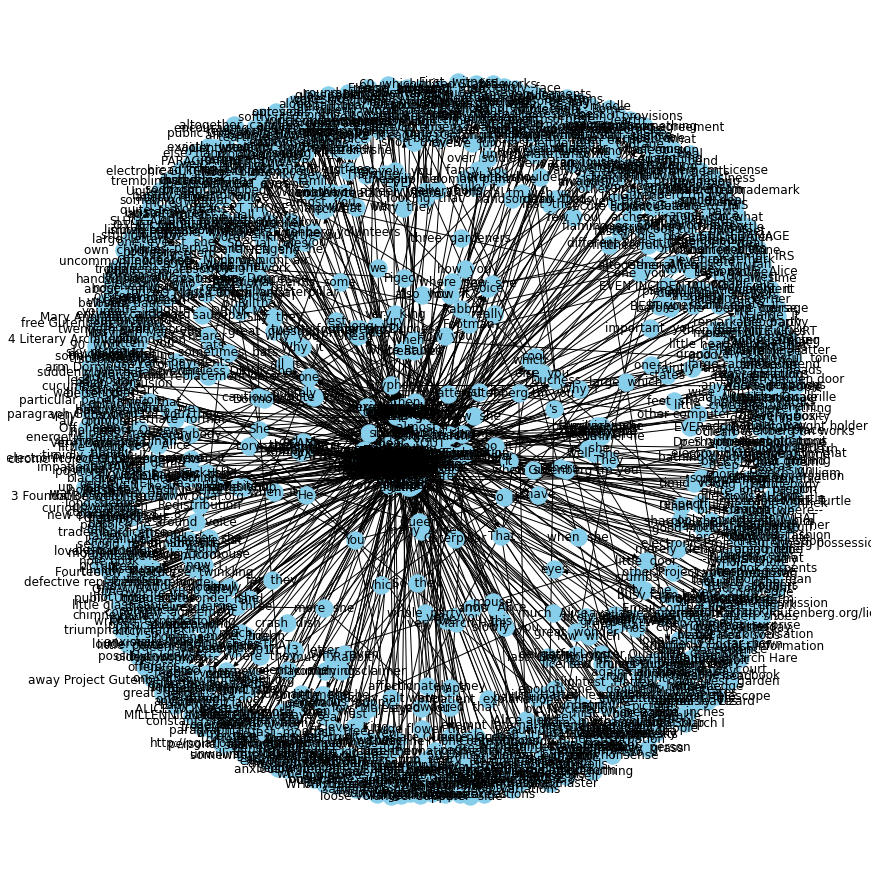

In [33]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Not what we were expecting 

Seems like this can be much better represented in hyperbolic space

Was unable to install graphviz hence trying to 1st install via apt-get install

!  apt-get install -y graphviz-dev

!pip install networkx[all]

In [36]:
from networkx.drawing.nx_agraph import graphviz_layout

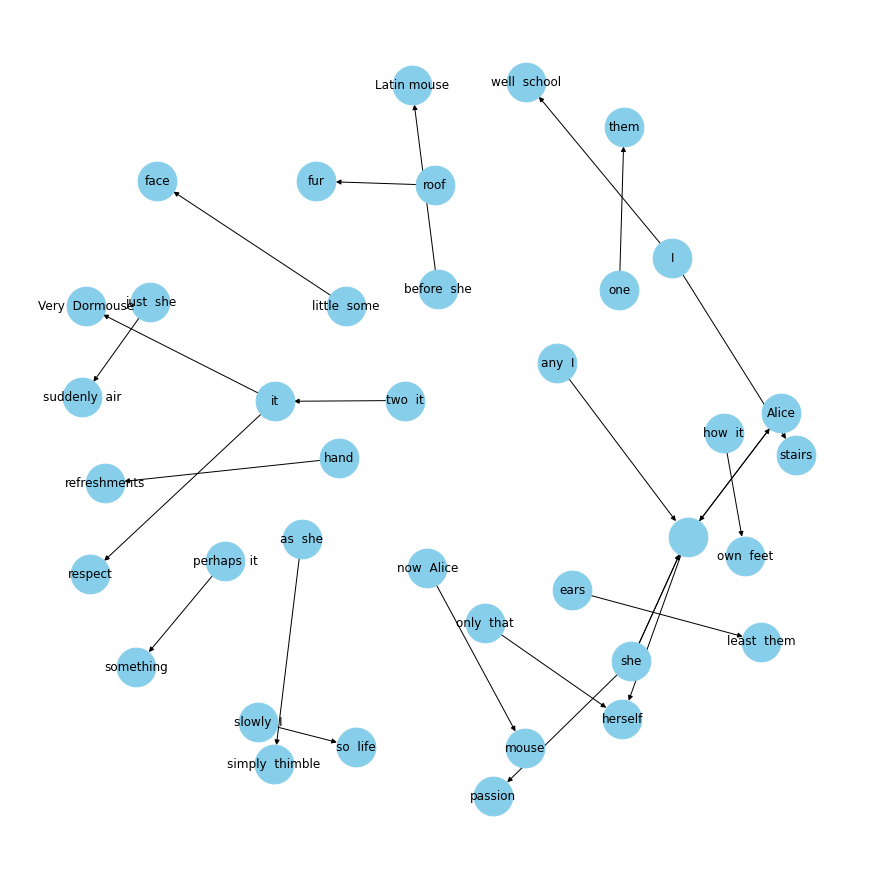

In [85]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="thought"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes

#pos = graphviz_layout(G, prog="twopi", args = "") #for circular graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

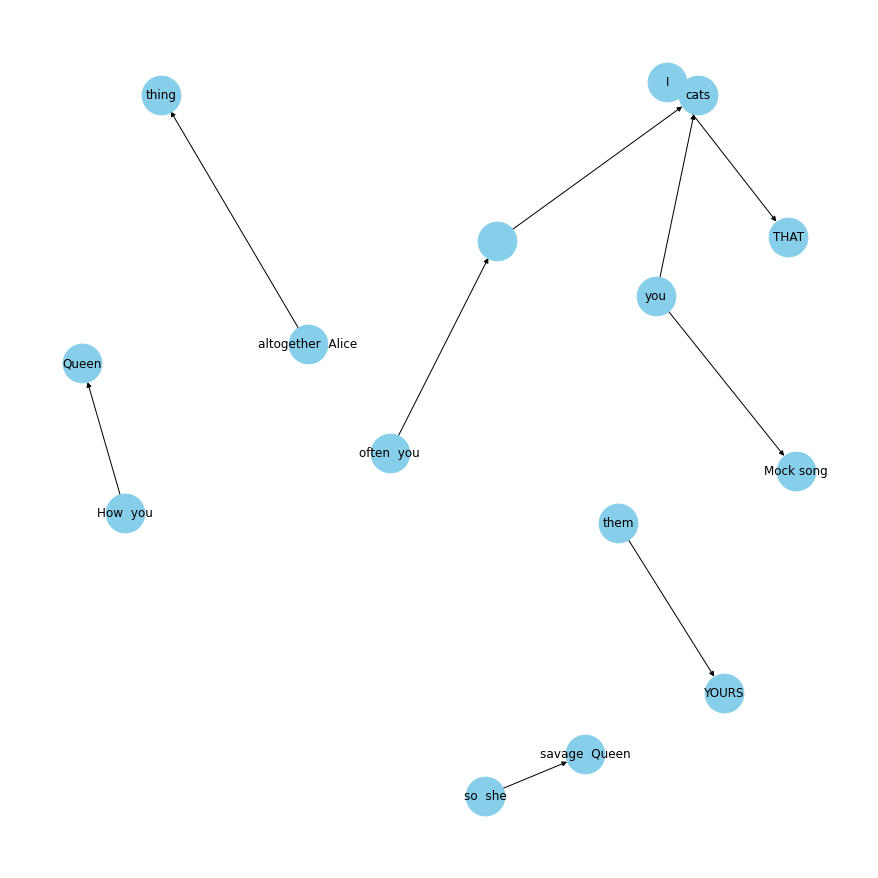

In [83]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [39]:
G.degree

DiMultiDegreeView({'': 2, 'cats': 2, 'you': 2, 'I': 1, 'THAT': 1, 'often  you': 1, 'them': 1, 'YOURS': 1, 'altogether  Alice': 1, 'thing': 1, 'How  you': 1, 'Queen': 1, 'so  she': 1, 'savage  Queen': 1, 'Mock song': 1})

In [54]:
G.edges()

OutMultiEdgeDataView([('', 'cats'), ('you', 'cats'), ('you', 'Mock song'), ('I', 'THAT'), ('often  you', ''), ('them', 'YOURS'), ('altogether  Alice', 'thing'), ('How  you', 'Queen'), ('so  she', 'savage  Queen')])

In [46]:
L = G.number_of_nodes()
L

15

Interactive visualization between networkx, plotly and dash

In [41]:
# igraph : Library for high performance graph generation and analysis
import igraph as ig


In [44]:
# Remember : G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="like"], "source", "target", 
#                          edge_attr=True, create_using=nx.MultiDiGraph())

N = G.nodes
N

NodeView(('', 'cats', 'you', 'I', 'THAT', 'often  you', 'them', 'YOURS', 'altogether  Alice', 'thing', 'How  you', 'Queen', 'so  she', 'savage  Queen', 'Mock song'))

In [52]:
Xv = [pos[k][0] for k in N]
Yv = [pos[k][1] for k in N]

In [60]:
Xed = []
Yed = []

pos=nx.fruchterman_reingold_layout(G)

In [67]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 297 kB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [80]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())



In [86]:
from plotly.graph_objects import Scatter, Figure
import chart_studio.plotly as py

for edge in G.edges():
    
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]
    
    
trace3 = Scatter(x = Xed,
                y = Yed,
                mode = 'lines',
                line = dict(color = 'rgb(210, 210, 210)', width = 1),
                hoverinfo = 'none'
                )

trace4 = Scatter(x = Xv,
                y = Yv,
                mode = 'markers',
                name = 'net',
                marker = dict(symbol = 'circle-dot',
                             size = 5,
                             color = '#6959CD',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               # text = labels,
                hoverinfo = 'text'
                )



annot="This networkx.Graph has the Fruchterman-Reingold layout<br>Code:"

data1 = [trace3, trace4]
fig1 = Figure(data = data1) 
             #layout = layout)
#fig1['layout']['annotations'][0]['text'] = annot
from plotly.offline import plot
plot( fig1, filename ="temp-plot.html", validate = False )

'temp-plot.html'

# Output : temp-plot.html